In [27]:
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

stem_model_info = {}
noStem_model_info = {}

path = './stem/'

file_name = os.listdir(path)
document_name = []

for file in file_name:
    stem_model_info[file] = {}
    document_name = os.listdir(path + file)
    for doc in document_name:
        if os.path.isfile(path + file + '/' + doc):
            with open(path + file + '/' + doc, 'r', encoding="utf-8") as f:
                str = f.read()
                data = []
                tmp = str.split('\n')
                for i in tmp:
                    j = i.split('\t')
                    data.append(j)
                data.pop()
                doc = doc.split('.')
                doc = doc[0]
                stem_model_info[file][doc] = data

path = './noStem/'

file_name = os.listdir(path)
document_name = []

for file in file_name:
    noStem_model_info[file] = {}
    document_name = os.listdir(path + file)
    for doc in document_name:
        if os.path.isfile(path + file + '/' + doc):
            with open(path + file + '/' + doc, 'r', encoding="utf-8") as f:
                str = f.read()
                data = []
                tmp = str.split('\n')
                for i in tmp:
                    j = i.split('\t')
                    data.append(j)
                data.pop()
                doc = doc.split('.')
                doc = doc[0]
                noStem_model_info[file][doc] = data

In [28]:
pp.pprint(stem_model_info)

{   'Laplace': {   'avg_prec': [['0.1571']],
                   'inter_RPcurve': [   ['0.00', '0.6089'],
                                        ['0.10', '0.3993'],
                                        ['0.20', '0.2681'],
                                        ['0.30', '0.2171'],
                                        ['0.40', '0.1712'],
                                        ['0.50', '0.1385'],
                                        ['0.60', '0.0971'],
                                        ['0.70', '0.0590'],
                                        ['0.80', '0.0331'],
                                        ['0.90', '0.0166'],
                                        ['1.00', '0.0064']],
                   'prec': [   ['5', '0.3280'],
                               ['10', '0.2920'],
                               ['15', '0.2480'],
                               ['20', '0.2260'],
                               ['30', '0.1933'],
                               ['100', '0.1234'],


In [29]:
pp.pprint(noStem_model_info)

{   'Laplace': {   'avg_prec': [['0.1540']],
                   'inter_RPcurve': [   ['0.00', '0.6448'],
                                        ['0.10', '0.4077'],
                                        ['0.20', '0.2640'],
                                        ['0.30', '0.2149'],
                                        ['0.40', '0.1641'],
                                        ['0.50', '0.1282'],
                                        ['0.60', '0.0873'],
                                        ['0.70', '0.0542'],
                                        ['0.80', '0.0258'],
                                        ['0.90', '0.0110'],
                                        ['1.00', '0.0035']],
                   'prec': [   ['5', '0.3480'],
                               ['10', '0.2940'],
                               ['15', '0.2600'],
                               ['20', '0.2330'],
                               ['30', '0.1987'],
                               ['100', '0.1146'],


In [73]:
data = {
    'documents': [247491, 247491],
    'unique terms': [1342611, 1525589],
    'total terms': [261742791, 261742791]
}
df = pd.DataFrame(data, index=['stemming', 'Without stemming'])
df

,documents,unique terms,total terms
stemming,247491,1342611,261742791
Without stemming,247491,1525589,261742791


In [72]:
model_name = []
Retrieved = []
Relevant = []
Rel_ret = []

for file in stem_model_info:
    model_name.append(file)
    for attr in stem_model_info[file]['totalnum']:
        if attr[0] == 'Retrieved:':
            Retrieved.append(attr[1])
        elif attr[0] == 'Relevant:':
            Relevant.append(attr[1])
        else:
            Rel_ret.append(attr[1])
            
data = {'Retrieved': Retrieved,
        'Relevant': Relevant,
        'Relevent_retrieved': Rel_ret}           

frame = pd.DataFrame(data , index=model_name)
frame

,Retrieved,Relevant,Relevent_retrieved
addK,48887,2279,1421
jelinek,48887,2279,1581
Laplace,48887,2279,1495
tfidf,48887,2279,1699


In [71]:
model_name = []
Retrieved = []
Relevant = []
Rel_ret = []

for file in noStem_model_info:
    model_name.append(file)
    for attr in noStem_model_info[file]['totalnum']:
        if attr[0] == 'Retrieved:':
            Retrieved.append(attr[1])
        elif attr[0] == 'Relevant:':
            Relevant.append(attr[1])
        else:
            Rel_ret.append(attr[1])
            
data = {'Retrieved': Retrieved,
        'Relevant': Relevant,
        'Relevent_retrieved': Rel_ret}           

frame2 = pd.DataFrame(data , index=model_name)
frame2

,Retrieved,Relevant,Relevent_retrieved
addK,48185,2279,1198
jelinek,48185,2279,1440
Laplace,48185,2279,1328
tfidf,48185,2279,1491


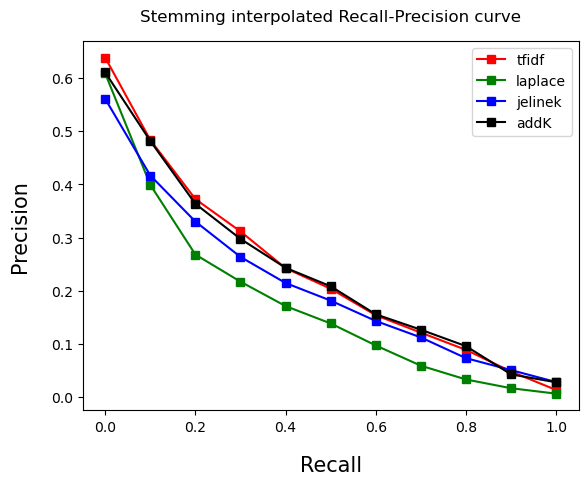

In [31]:
recall = []
prec_tfidf = []
prec_laplace=[]
prec_jelinek=[]
prec_addK=[]

for i in stem_model_info['tfidf']['inter_RPcurve']:
    recall.append(float(i[0]))
    prec_tfidf.append(float(i[1]))

for i in stem_model_info['Laplace']['inter_RPcurve']:
    prec_laplace.append(float(i[1]))

for i in stem_model_info['jelinek']['inter_RPcurve']:
    prec_jelinek.append(float(i[1]))

for i in stem_model_info['addK']['inter_RPcurve']:
    prec_addK.append(float(i[1])) 

    
plt.plot(recall,prec_tfidf,'s-',color = 'r', label="tfidf")
plt.plot(recall,prec_laplace,'s-',color = 'g', label="laplace")
plt.plot(recall,prec_jelinek,'s-',color = 'b', label="jelinek")
plt.plot(recall,prec_addK,'s-',color = 'black', label="addK")


plt.title("Stemming interpolated Recall-Precision curve", x=0.5, y=1.03)
plt.xlabel("Recall", fontsize=15, labelpad = 15)
plt.ylabel("Precision", fontsize=15, labelpad = 15)
plt.legend(loc = "best", fontsize=10)

plt.show()

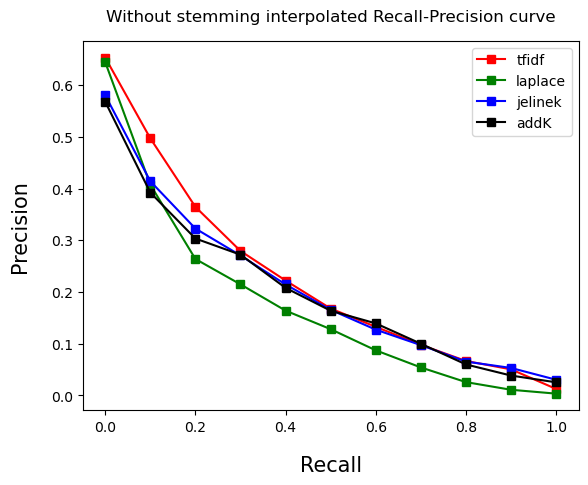

In [32]:
recall = []
prec_tfidf = []
prec_laplace=[]
prec_jelinek=[]
prec_addK=[]

for i in noStem_model_info['tfidf']['inter_RPcurve']:
    recall.append(float(i[0]))
    prec_tfidf.append(float(i[1]))

for i in noStem_model_info['Laplace']['inter_RPcurve']:
    prec_laplace.append(float(i[1]))

for i in noStem_model_info['jelinek']['inter_RPcurve']:
    prec_jelinek.append(float(i[1]))

for i in noStem_model_info['addK']['inter_RPcurve']:
    prec_addK.append(float(i[1]))

    
plt.plot(recall,prec_tfidf,'s-',color = 'r', label="tfidf")
plt.plot(recall,prec_laplace,'s-',color = 'g', label="laplace")
plt.plot(recall,prec_jelinek,'s-',color = 'b', label="jelinek")
plt.plot(recall,prec_addK,'s-',color = 'black', label="addK")

plt.title("Without stemming interpolated Recall-Precision curve", x=0.5, y=1.03)
plt.xlabel("Recall", fontsize=15, labelpad = 15)
plt.ylabel("Precision", fontsize=15, labelpad = 15)
plt.legend(loc = "best", fontsize=10)

plt.show()

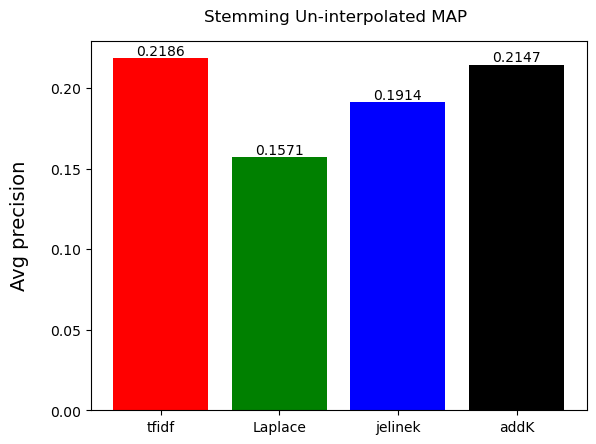

In [33]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['avg_prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Stemming Un-interpolated MAP ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("Avg precision", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()

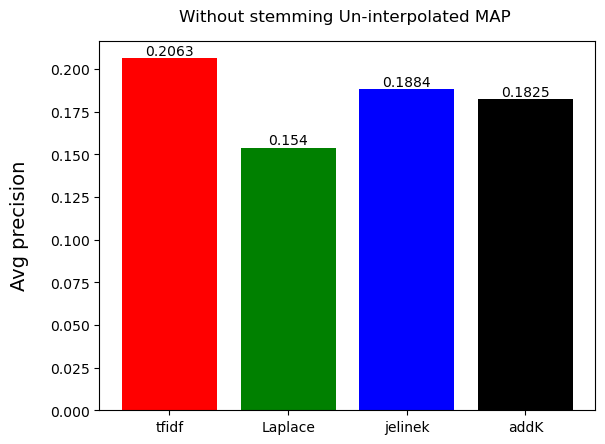

In [45]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['avg_prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Without stemming Un-interpolated MAP ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("Avg precision", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()

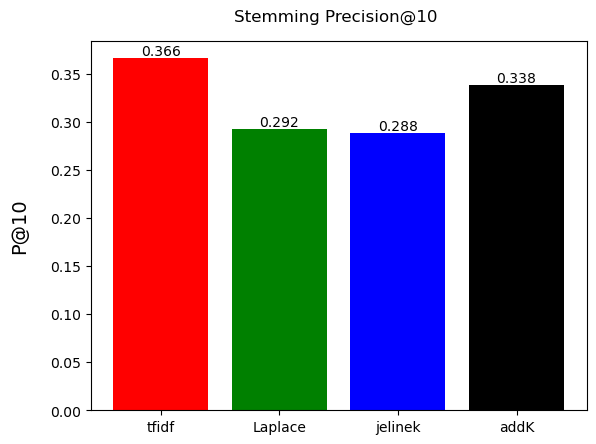

In [39]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['prec'][1][1]))

x.reverse()
y.reverse()

plt.title("Stemming Precision@10 ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("P@10", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()

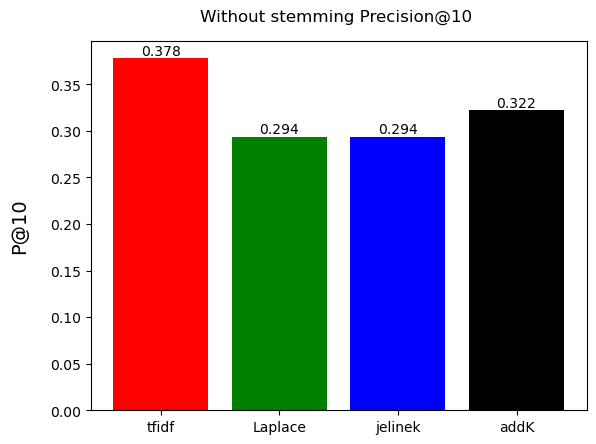

In [41]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['prec'][1][1]))

x.reverse()
y.reverse()

plt.title("Without stemming Precision@10 ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("P@10", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()

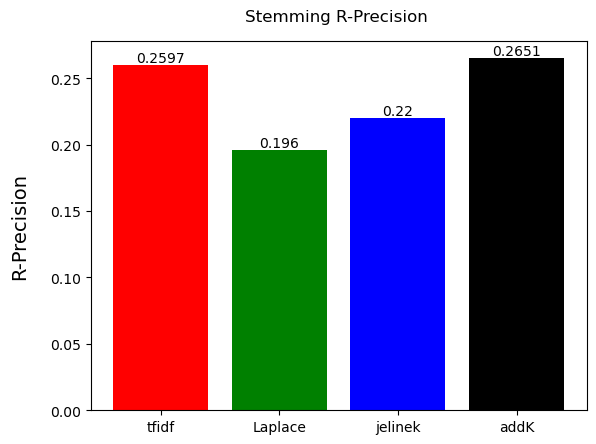

In [43]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['r-prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Stemming R-Precision ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("R-Precision", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()

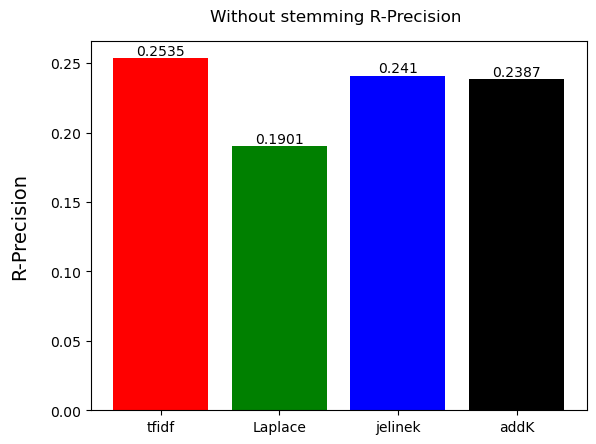

In [44]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['r-prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Without stemming R-Precision ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b', 'black'])
plt.ylabel("R-Precision", fontsize=14, labelpad = 15)

for i, v in enumerate(y):
    plt.text(x[i], v, v, horizontalalignment="center", verticalalignment="bottom")

plt.show()